In [1]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
#from libs.dim_reduction import *
from libs.football_plots import *
#from libs.clustering import *
from libs.convex_hull import *

import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


In [4]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data/H_EURO2024GERMANY", "Denmark")
print(data.head())
one_match = extract_one_match(data, 1)
#mean_xy = calculate_xy_mean(one_match.iloc[::48].filter(regex="^home").to_numpy())
ripley_k_whole_match = ripley_k_by_indices(one_match, one_match.iloc[::48].index)


   Time [s]_team half_team  minute_team  Period_team   home_6_x  home_6_y  \
0           0.00        1H            0            1  18.863983  6.937420   
1           0.04        1H            0            1  18.860191  6.943985   
2           0.08        1H            0            1  18.856722  6.951682   
3           0.12        1H            0            1  18.853645  6.960831   
4           0.16        1H            0            1  18.851160  6.971420   

   home_18_x  home_18_y   home_1_x  home_1_y  ...  away_16_x  away_16_y  \
0  16.191383  27.790174  52.532173 -0.016596  ...        NaN        NaN   
1  16.196404  27.782358  52.532738 -0.013765  ...        NaN        NaN   
2  16.200035  27.776085  52.534679 -0.010368  ...        NaN        NaN   
3  16.201321  27.769873  52.537842 -0.006824  ...        NaN        NaN   
4  16.199764  27.763958  52.543060 -0.003730  ...        NaN        NaN   

   away_25_x  away_25_y  home_26_x  home_26_y  away_3_x  away_3_y  away_15_x  \
0     

In [6]:
%matplotlib widget

import matplotlib.pyplot as plt
from mplsoccer import Pitch
import ipywidgets as widgets
from IPython.display import display

# Initialize plot
football_pitch = Pitch(pitch_type='skillcorner', pitch_length=105, pitch_width=68, axis=True, label=True, line_color="white", pitch_color="grass")
fig, ax = football_pitch.draw(figsize=(10, 7))

# List to store points for the current situation and vectors
players =[]
points = []
vectors = []
situations = []

# Boolean to check if we're in vector drawing mode
draw_vector_mode = False
vector_start = None  # To store the start point of the vector

# Function to handle mouse clicks for points and vectors
def on_click(event):
    global vector_start, draw_vector_mode
    
    if event.inaxes:  # Check if click is inside plot
        x, y = event.xdata, event.ydata  # Get coordinates
        
        if draw_vector_mode:
            if vector_start is None:  # If no start point, set this as start point
                vector_start = (x, y)
                ax.plot(x, y, 'bo')  # Mark the start point with a blue dot
            else:
                # If there's already a start point, draw the vector from start to this point
                vector_end = (x, y)
                ax.annotate('', xy=vector_end, xytext=vector_start,
                            arrowprops=dict(facecolor='red', shrink=0.05))  # Draw vector
                vectors.append((vector_start, vector_end))  # Save the vector
                vector_start = None  # Reset the start point
        else:
            points.append((x, y))  # Add to list of points
            ax.plot(x, y, 'ro')  # Plot the point
        
        plt.draw()  # Redraw the figure

# Function to save the current situation
def save_situation(_):
    if points or vectors:
        situations.append({'points': list(points), 'vectors': list(vectors)})  # Save the current points and vectors
        print(f"Situation saved! Total saved situations: {len(situations)}")
    else:
        print("No players or vectors to save!")

# Function to clear the current situation
def clear_situation(_):
    global points, vectors, vector_start
    points = []  # Clear the current points
    vectors = []  # Clear the current vectors
    vector_start = None  # Reset vector start point
    ax.cla()  # Clear the plot
    football_pitch.draw(ax=ax)  # Redraw the empty pitch
    plt.draw()
    print("Cleared the current situation. You can now draw a new one.")

# Function to toggle vector drawing mode
def toggle_draw_vector(_):
    global draw_vector_mode
    draw_vector_mode = not draw_vector_mode  # Toggle the mode
    if draw_vector_mode:
        print("Vector drawing mode enabled. Select start and end points for the vector.")
    else:
        print("Switched to player drawing mode.")

def select_player(player_num):
    players.append(player_num)
    print(players)

def remove_player(player_num):
    try:
        players.remove(player_num)
        print(players)
    except:
        print("Player not in list")

# Create save, clear, and toggle vector buttons
save_button = widgets.Button(description="Save Situation", button_style='success')
clear_button = widgets.Button(description="Clear", button_style='warning')
toggle_vector_button = widgets.Button(description="Toggle Draw Vector", button_style='info')

#Create buttons for player filter
buttons = []
#Get unique players
players_xy = one_match.filter(regex="^home").columns.to_numpy()
player_numbers = np.array([player[:-1] for player in players_xy])
player_numbers = np.unique(player_numbers)


for number in player_numbers:
    save_button_player = widgets.Button(description=str(number))
    undo_button = widgets.Button(description="remove player "+str(number))
    save_button_player.on_click(lambda _, n=number: select_player(n))
    undo_button.on_click(lambda _, n=number: remove_player(n))
    buttons.append(save_button_player)
    buttons.append(undo_button)
    




# Connect button click events to their functions
save_button.on_click(save_situation)
clear_button.on_click(clear_situation)
toggle_vector_button.on_click(toggle_draw_vector)
buttons.append(save_button)
buttons.append(clear_button)
buttons.append(toggle_vector_button)
# Connect the click event to the handler
fig.canvas.mpl_connect('button_press_event', on_click)



# Display the buttons below the plot
display(widgets.HBox(buttons))

plt.show()



KeyError: 'widgets'

In [ ]:
regex = ""
for player in players:
    regex += "^"+player + "|" 
regex = regex[:-1]


#one_match = one_match.filter(regex = regex)
print(one_match.columns)

Index(['Time [s]', 'Time [s]_team', 'half_team', 'minute_team', 'Period_team',
       'home_6_x', 'home_6_y', 'home_18_x', 'home_18_y', 'home_1_x',
       'home_1_y', 'home_10_x', 'home_10_y', 'home_3_x', 'home_3_y',
       'home_2_x', 'home_2_y', 'home_19_x', 'home_19_y', 'home_21_x',
       'home_21_y', 'home_9_x', 'home_9_y', 'home_17_x', 'home_17_y',
       'home_23_x', 'home_23_y', 'home_20_x', 'home_20_y', 'home_15_x',
       'home_15_y', 'home_8_x', 'home_8_y', 'home_5_x', 'home_5_y',
       'home_12_x', 'home_12_y', 'ball_x_team', 'ball_y_team', 'ball_z_team',
       'half', 'minute', 'Period', 'away_10_x', 'away_10_y', 'away_2_x',
       'away_2_y', 'away_17_x', 'away_17_y', 'away_22_x', 'away_22_y',
       'away_9_x', 'away_9_y', 'away_1_x', 'away_1_y', 'away_20_x',
       'away_20_y', 'away_21_x', 'away_21_y', 'away_11_x', 'away_11_y',
       'away_13_x', 'away_13_y', 'away_6_x', 'away_6_y', 'away_7_x',
       'away_7_y', 'away_5_x', 'away_5_y', 'away_14_x', 'away_14_y',
   

In [ ]:
from libs.convex_hull import *

print(points)

hulls, indices = convex_hull(one_match.iloc[::48])

chosen_hull = ConvexHull(points)
chosen_hull = normalize_hull(chosen_hull)

top_100_hulls = top_n_similar_hulls(chosen_hull, hulls,indices,100)

relevant_situations = np.array(top_100_hulls)[:,1]

fig, ax = plt.subplots(2, 5, figsize=(15, 10))

# Create the pitch with the desired settings
for hull, i in zip(top_100_hulls[:10], range(len(top_100_hulls[:10]))):
    row = i // 5  # Determine the row index
    col = i % 5   # Determine the column index
    print(hull[1])
    # Create a new pitch on each subplot
    football_pitch = Pitch(pitch_type='skillcorner', pitch_length=105, pitch_width=68, axis=True, 
                           label=True, line_color="white", pitch_color="grass")
    football_pitch.draw(ax=ax[row, col])  # Draw the pitch on the current axis
    
    # Scatter plot for convex hull points
    ax[row, col].scatter(hull[0].points[:, 0], hull[0].points[:, 1], color='red', s=10)

plt.tight_layout()
plt.show()
radii = np.arange(0, 34)

print(ripley_k(one_match.loc[85920].filter(regex ="^home"), radii, width=105.0, height=68.0))
points_array = np.array(points)
points_series = pd.Series(points_array.flatten())
print(ripley_k(points_series, radii, width=105.0, height=68.0))


[]


IndexError: tuple index out of range

In [ ]:
# Ensure the interactive pitch has captured points
if not points:
    print("Please click on the pitch to add points.")
else:
    print(f"Collected {len(points)} points.")

# Step 2: Convert the points from the interactive pitch into a usable format
points_array = np.array(points)  # Convert the collected points into a NumPy array

if points_array.shape[0] > 1:
    # Flatten the points for Ripley's K
    points_series = pd.Series(points_array.flatten())
    print(points_series)

    # Step 3: Define the radii for Ripley's K
    radii = np.arange(0, 34)  # Adjust the range based on your use case

    # Step 4: Calculate Ripley's K for the clicked points
    k_values_clicked = ripley_k(points_series, radii, width=105.0, height=68.0)

    # Step 5: Plot Ripley's K values for the clicked points
    plt.figure(figsize=(8, 6))
    plt.plot(radii, k_values_clicked, label="Ripley's K for Clicked Points")
    plt.xlabel('Distance (m)')
    plt.ylabel("K(d)")
    plt.title("Ripley's K Function for Clicked Points")
    plt.legend()
    plt.show()
else:
    print("Not enough points for Ripley's K calculation.")

NameError: name 'points' is not defined

here
here


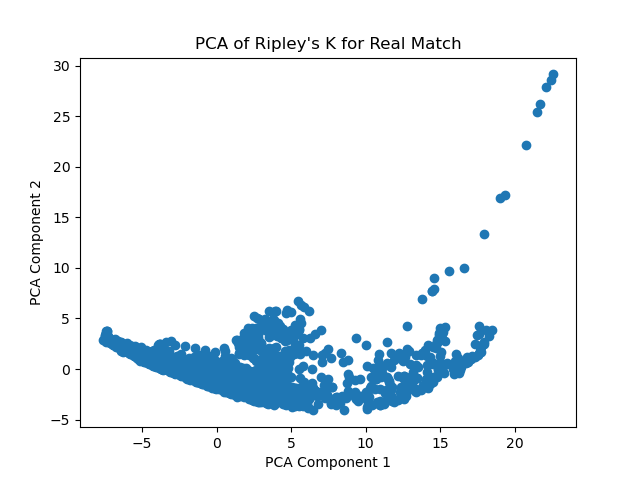

In [ ]:
# Step 7: Calculate Ripley's K values for the real match data

ripley_k_vals_relevant = ripley_k_by_indices(one_match, relevant_situations)


#Added average position of team as feature

# Step 8: Perform PCA on the Ripley's K values from the real match data
pca_obj_ripley = PCAObject(ripley_k_whole_match, 10)  # Fit PCA with 10 components
np_pca_ripley = pca_obj_ripley.transform(ripley_k_vals_relevant)
np_pca_ripley_full_match = pca_obj_ripley.transform(ripley_k_whole_match)

# Step 9: Plot the PCA-reduced Ripley's K values for the real match
plt.figure()
plt.scatter(np_pca_ripley_full_match[:, 0], np_pca_ripley_full_match[:, 1])
plt.title("PCA of Ripley's K for Real Match")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.savefig("pca_ripley.png")
plt.show()

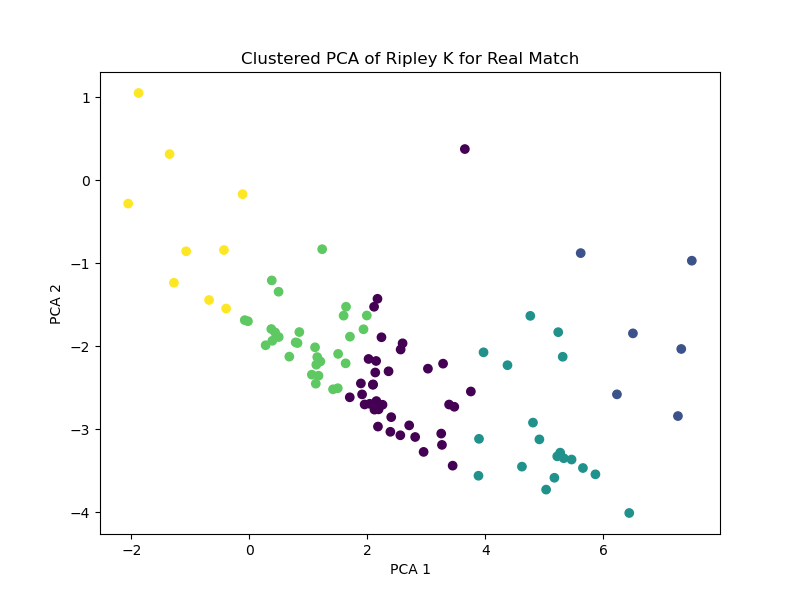

In [ ]:
# Step 10: Cluster the PCA-reduced Ripley's K values using KMeans
clustering_obj_ripley = KMeansObject(np_pca_ripley, 5)  # Fit KMeans with 5 clusters
labels = clustering_obj_ripley.get_labels()

# Step 11: Plot the clustered PCA-reduced Ripley's K values
plt.figure(figsize=(8, 6))
plt.scatter(np_pca_ripley[:, 0], np_pca_ripley[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustered PCA of Ripley K for Real Match')
plt.savefig("pca_ripley_clustered.png")
plt.show()

here


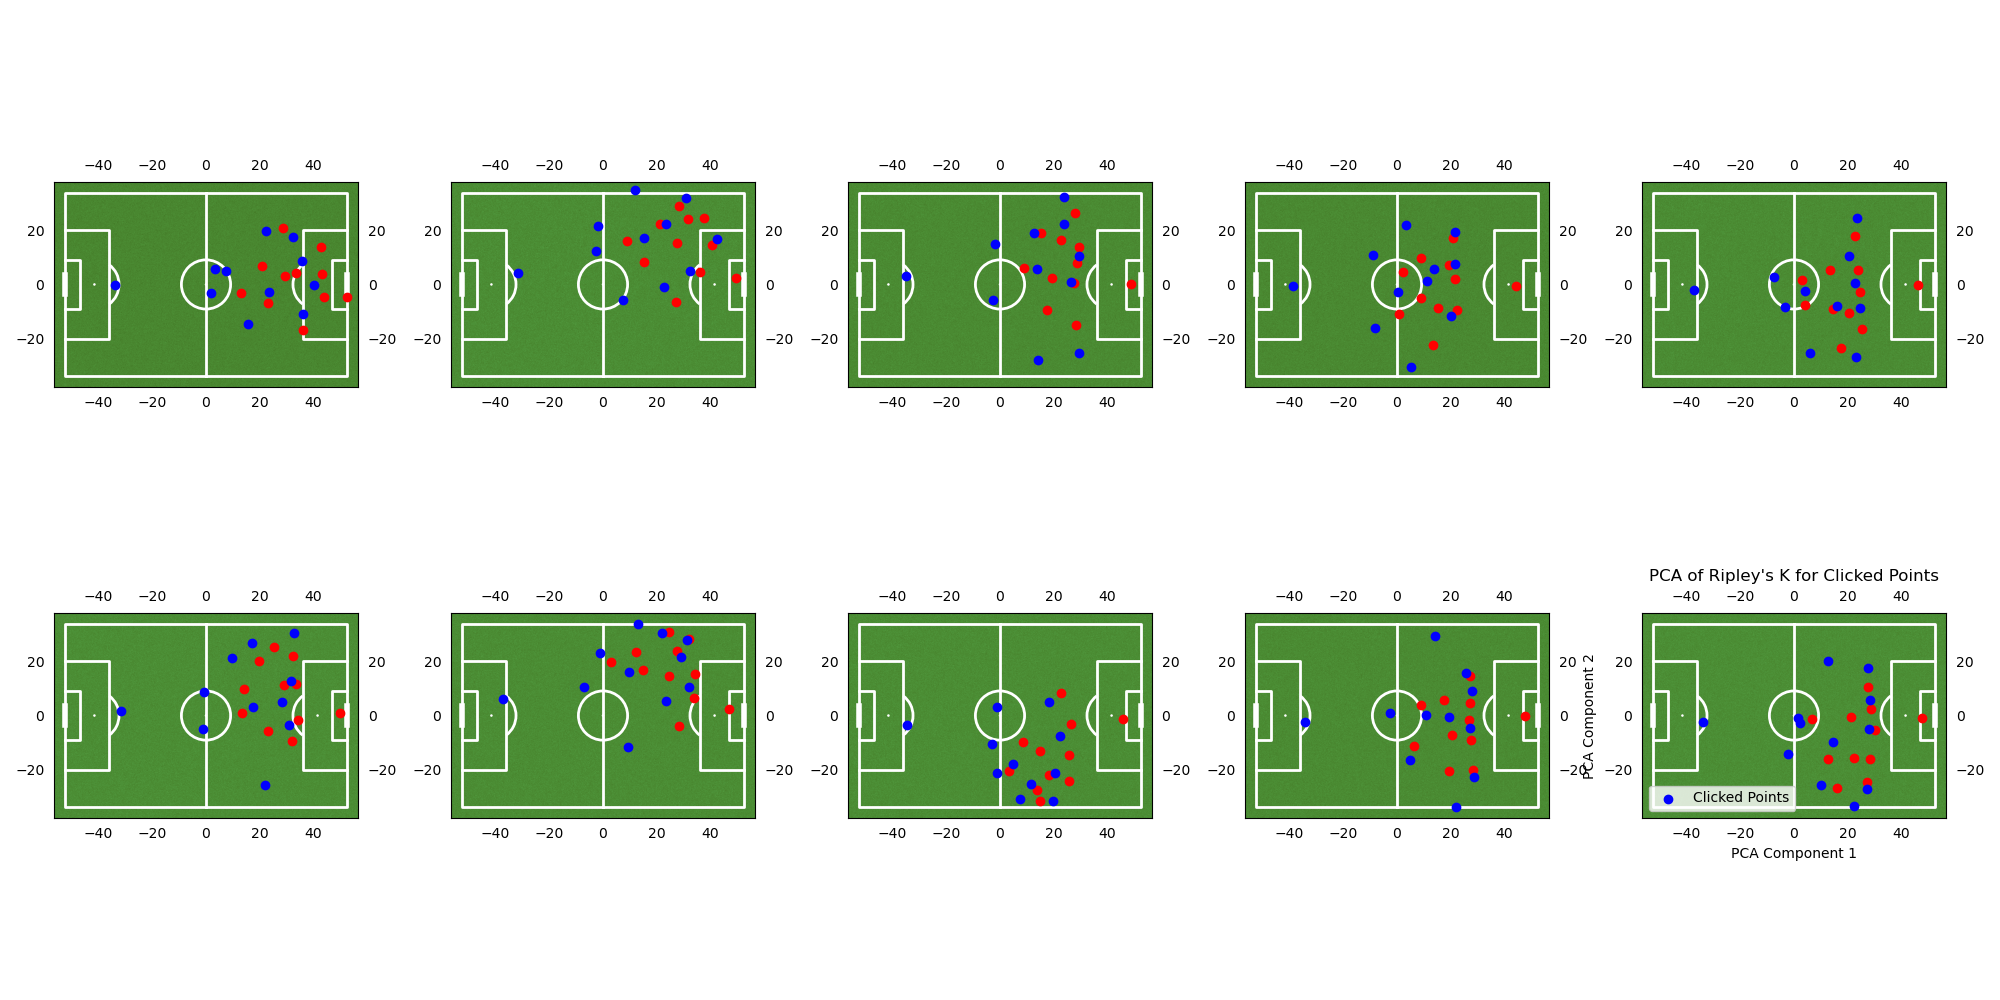

In [ ]:
# Step 12: Apply PCA on the Ripley's K values for the clicked points
if points_array.shape[0] > 1:
    
    k_values_clicked_new = np.array(k_values_clicked).reshape(1, -1)  # Reshape for PCA compatibility
   



    
  
    reduced_k_values_clicked = pca_obj_ripley.transform(k_values_clicked_new)  # Transform using the same PCA model

    # Step 13: Plot the PCA-reduced clicked points

    plt.scatter(reduced_k_values_clicked[:, 0], reduced_k_values_clicked[:, 1], c='blue', label='Clicked Points')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title("PCA of Ripley's K for Clicked Points")
    plt.legend()
    plt.show()
else:
    print("Not enough points for Ripley's K calculation.")

In [ ]:
from sklearn.neighbors import KDTree

# Step 1: Build a KDTree from the PCA-reduced real match data
tree = KDTree(np_pca_ripley)

# Step 2: Query the 10 nearest neighbors for the clicked situation
distances, indices = tree.query(reduced_k_values_clicked, k=10)  # Find 10 nearest neighbors

# Flatten the indices
closest_indices = indices.flatten()
print("Closest situation indices:", closest_indices)


Closest situation indices: [ 1  3 98 47 33 94 57 93 84 38]


In [ ]:
# Assuming `one_match` is a DataFrame where each row contains player positions for a specific situation
# Each row of `one_match` contains the player positions in the format: [(x1, y1), (x2, y2), ...]

# Retrieve the 10 closest situations from the real match

closest_situations_indices = np.array(top_100_hulls)[closest_indices,1]

print(closest_situations_indices)
closest_situations = one_match.loc[closest_situations_indices]


[119184 90624 47760 31536 35952 109104 111072 7872 47952 17520]


In [ ]:
one_match

,Time [s],frame_team,Time [s]_team,half_team,home_1_x,home_1_y,home_3_x,home_3_y,home_4_x,home_4_y,...,away_16_y,away_17_x,away_17_y,away_22_x,away_22_y,away_23_x,away_23_y,ball_x,ball_y,Period
119184,4706.72,2H,78,2,43.044453,3.994369,28.623697,21.123880,52.471657,-4.670624,...,5.169617,NaN,NaN,NaN,NaN,36.03183,-11.017366,NaN,NaN,NaN
90624,3564.32,2H,59,2,40.477463,14.502671,28.099606,29.208271,49.288734,2.395949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47760,1910.40,1H,31,1,28.823547,8.017667,27.844173,26.450382,48.625191,0.257314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.181014,18.947122,0.133708
31536,1261.44,1H,21,1,21.502663,1.860504,13.260823,-22.610281,44.128998,-0.531398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.047939,-14.596207,0.149329
35952,1438.08,1H,23,1,24.617773,-2.638156,22.686687,17.855516,46.083878,-0.042700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.706216,-2.755569,3.057231
109104,4303.52,2H,71,2,33.606945,11.799489,25.145205,25.375021,49.679623,1.073916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.649433,23.332417,0.125087
111072,4382.24,2H,73,2,34.033333,15.379683,24.627409,31.144163,46.780609,2.308459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.717365,31.568771,2.595994
7872,314.88,1H,5,1,25.650240,-14.855664,22.734966,8.285743,45.634808,-1.300120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.203862,-25.329743,0.096275
47952,1918.08,1H,31,1,26.763676,-1.584595,27.216061,14.674927,47.504814,-0.331239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.754971,-16.699241,0.136780
17520,700.80,1H,11,1,30.030350,-5.345769,27.664732,10.599998,47.610912,-0.882290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.525628,-25.860835,0.096337


In [ ]:
# Retrieve the 10 closest situations from the real match with time[s] column
closest_situations = one_match.loc[closest_indices,'Time [s]']  # Select time[s] along with other columns if needed


In [ ]:
# Add time step columns to the closest situations. Each index is 24 time ticks
closest_situations

1176    47.04
488     19.52
764     30.56
368     14.72
277     11.08
342     13.68
1275    51.00
756     30.24
1175    47.00
765     30.60
Name: Time [s], dtype: float64

AttributeError: 'numpy.float64' object has no attribute 'index'

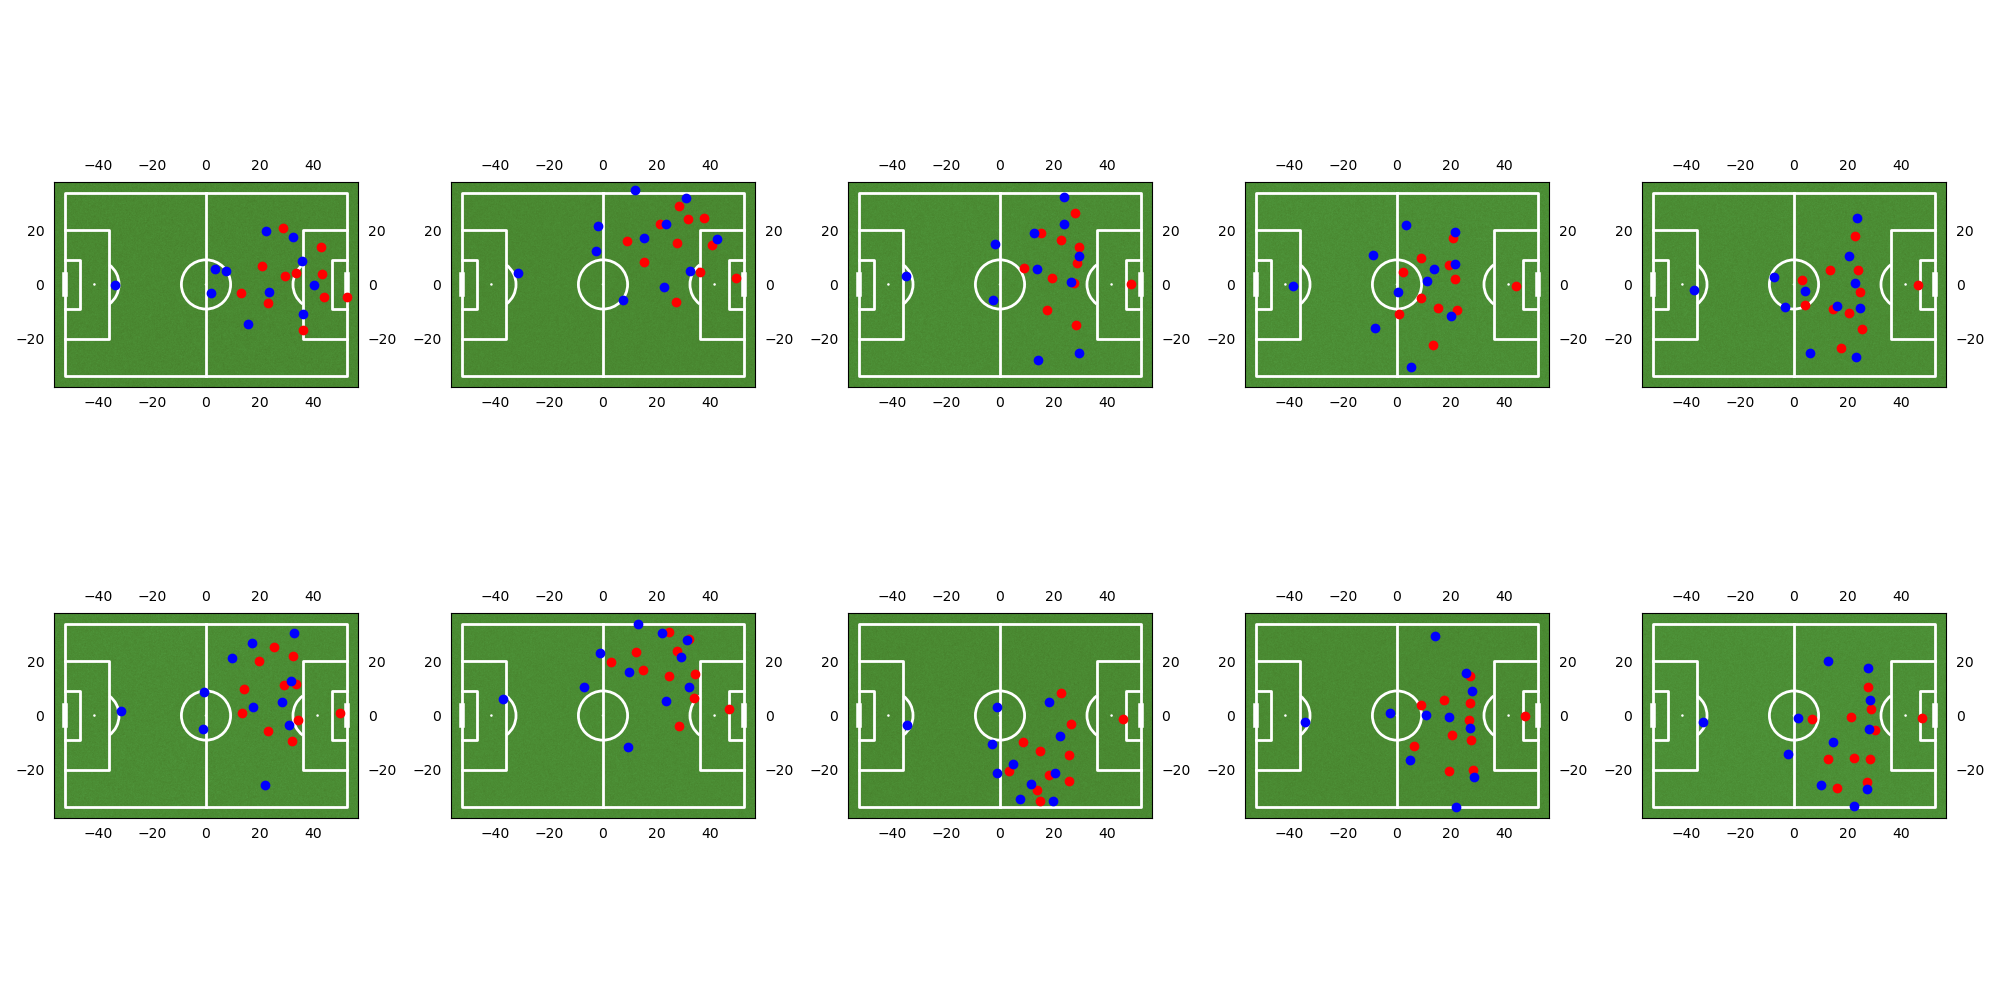

In [ ]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import pandas as pd

# Function to extract player coordinates from the DataFrame
def extract_player_positions(row):
    # Extract home player positions (x and y)
    home_x_cols = [col for col in row.index if 'home' in col and '_x' in col]
    home_y_cols = [col for col in row.index if 'home' in col and '_y' in col]
    
    home_positions = [(row[x], row[y]) for x, y in zip(home_x_cols, home_y_cols) if not pd.isna(row[x]) and not pd.isna(row[y])]

    # Extract away player positions (x and y)
    away_x_cols = [col for col in row.index if 'away' in col and '_x' in col]
    away_y_cols = [col for col in row.index if 'away' in col and '_y' in col]
    
    away_positions = [(row[x], row[y]) for x, y in zip(away_x_cols, away_y_cols) if not pd.isna(row[x]) and not pd.isna(row[y])]

    return home_positions, away_positions

# Function to plot a single situation on the pitch
def plot_situation(row, ax):
    football_pitch = Pitch(pitch_type='skillcorner', pitch_length=105, pitch_width=68, axis=True, label=True, line_color="white", pitch_color="grass")
    football_pitch.draw(ax=ax)
    
    # Extract player positions from the row
    home_positions, away_positions = extract_player_positions(row)
    
    # Plot home team players (red)
    for pos in home_positions:
        ax.plot(pos[0], pos[1], 'ro', label='Home Team')  # Mark home players as red dots

    # Plot away team players (blue)
    for pos in away_positions:
        ax.plot(pos[0], pos[1], 'bo', label='Away Team')  # Mark away players as blue dots
    
    ax.set_title(f"Situation at Time: {row['Time [s]']:.2f} sec")

# Step 4: Visualize the 10 closest situations on the pitch
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # Create a grid for 10 situations
axes = axes.flatten()

# Make sure closest_situations contains all required columns from the original DataFrame
if 'Time [s]' in closest_situations.columns:
    for idx, situation_index in enumerate(closest_situations.index):  # Use the index of the closest situations
        plot_situation(closest_situations.loc[situation_index], axes[idx])  # Pass the row to plot_situation
else:
    print("Ensure that closest_situations contains full rows, including player position columns.")

plt.tight_layout()
plt.show()
